In [1]:
import pandas as pd

from ml_pairs import MLPairs

In [2]:
df = pd.read_csv('dataset/universe.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df = df.loc[:, df.isnull().mean() < .8] # we will drop stocks if more than 80% of the stock price is NaN
df.dropna(how='all', axis=0, inplace=True)
df.dropna(how='all', axis=1, inplace=True)
df.head()

,ALGN,EA,CL,HON,JBHT,A,FTNT,KMI,VLO,PPG,...,EFX,ETFC,ALL,OKE,EBAY,APA,XLNX,VMC,KO,BWA
Date,,,,,,,,,,,,,,,,,,,,,
2010-10-06,19.690001,17.410000,27.241766,34.670612,32.176006,21.479910,12.095,NaN,11.664612,28.605364,...,27.445356,14.466259,25.986616,11.738329,10.024855,84.551315,20.536537,35.074966,20.869581,23.428167
2010-10-07,19.830000,17.580000,27.164413,34.488613,32.031315,21.828375,12.040,NaN,11.818445,28.525013,...,27.480303,14.241750,26.051338,11.829781,10.147860,84.458076,20.712275,34.253239,20.743938,23.136379
2010-10-08,19.629999,17.650000,27.587996,34.693352,32.094631,22.222866,12.095,NaN,11.965592,28.777550,...,27.567677,14.446737,26.229332,11.896519,10.090457,86.051514,20.832096,33.967041,20.733465,23.710974
2010-10-11,19.570000,17.660000,27.569584,34.587193,32.356869,22.189989,12.500,NaN,12.099360,28.697199,...,27.471565,14.456497,26.237421,11.911348,9.959253,86.458298,21.255447,33.708519,20.785822,23.576305
2010-10-12,19.879999,16.610001,27.602724,34.541687,32.212181,22.143965,12.495,NaN,12.019098,28.888515,...,27.445356,14.417452,26.310234,11.916292,10.024855,86.085381,21.431177,33.246895,20.799784,23.841158


# A. Dimensionality reduction

The first step towards this direction consists in finding a compact representation for each asset, starting from its price series.

In [3]:
mlp = MLPairs(df, seed=19)
mlp.dim_reduction(top_k=15)

2020-10-09 17:21:55,924 - [ml_pairs:INFO] - Begining Part A. Dimensionality reduction.


# B. Unsupervised Learning clustering

- dbscan
- optics

2020-10-09 17:21:56,032 - [ml_pairs:INFO] - Begining Part B. Unsupervised Learning Clustering using dbscan
2020-10-09 17:21:56,051 - [ml_pairs:INFO] - Total number of candidate pairs (before clustering): 121771.
2020-10-09 17:21:56,054 - [ml_pairs:INFO] - Total number of candidate pairs (after clustering): 43228.


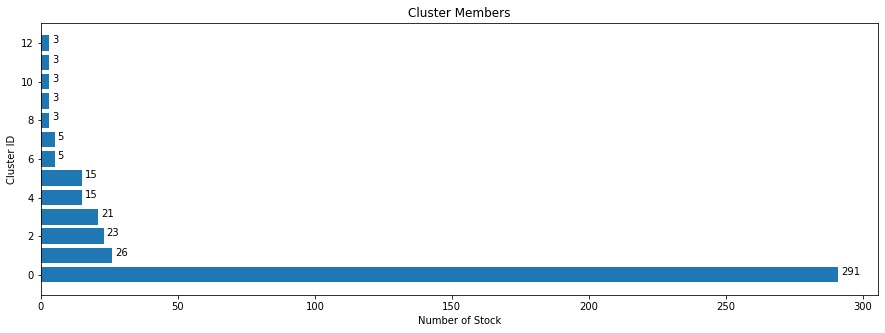

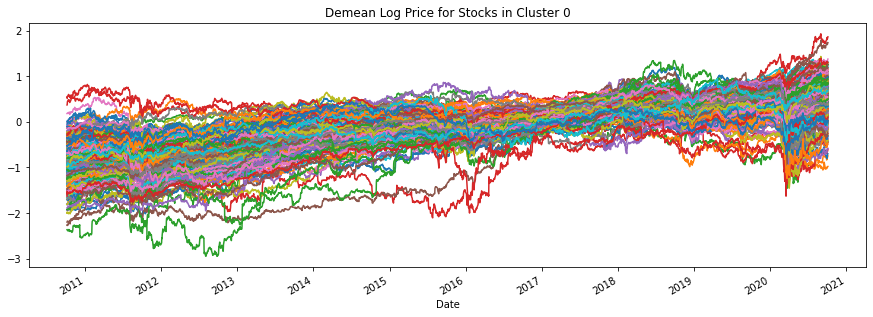

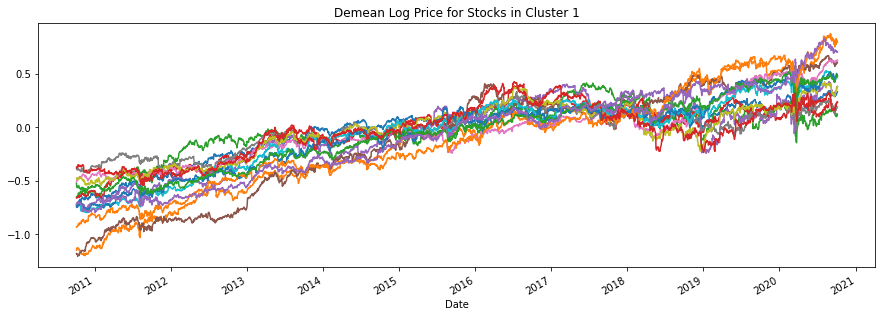

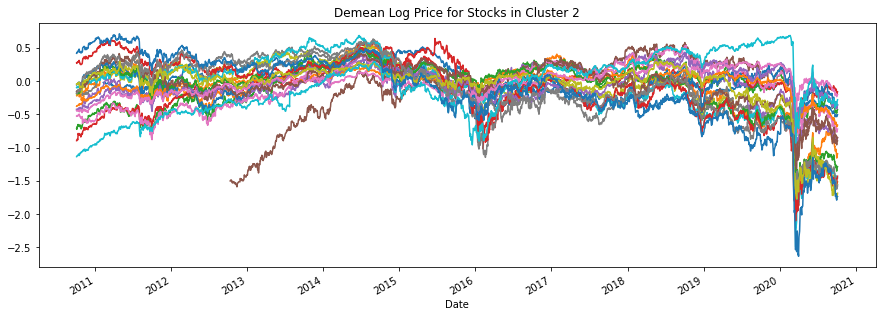

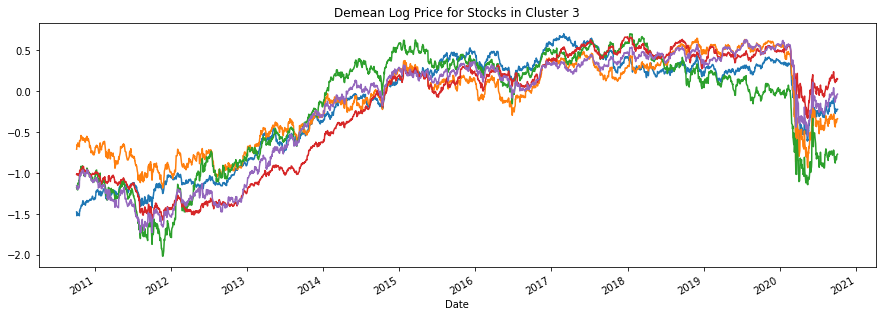

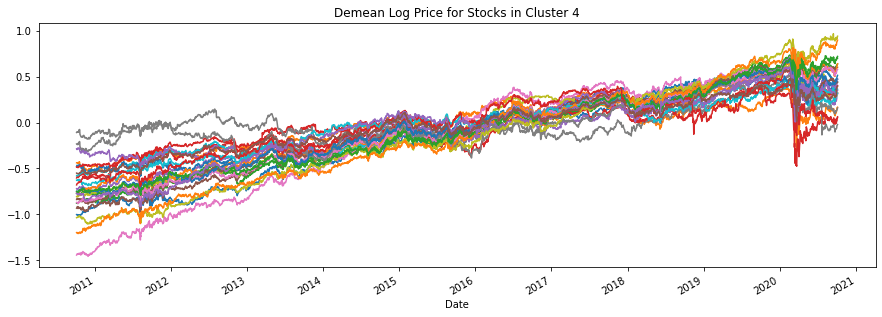

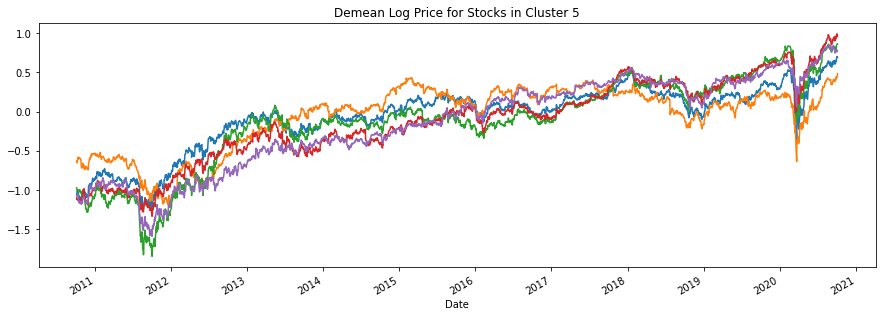

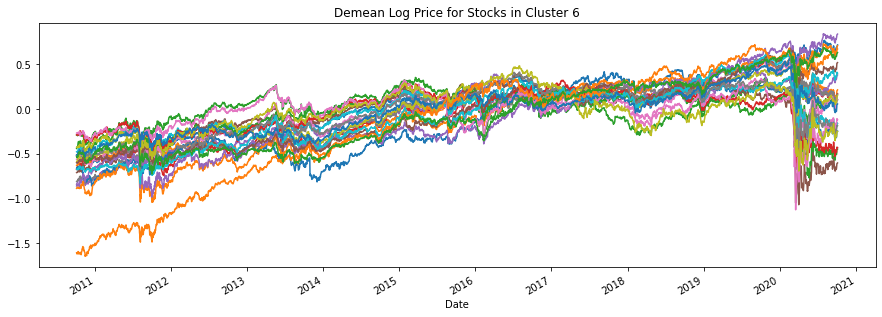

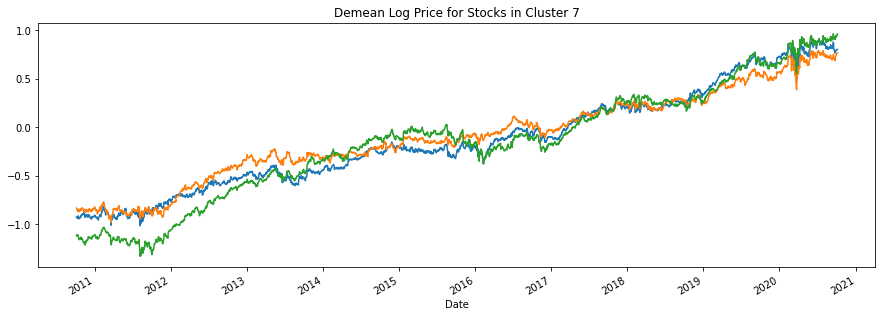

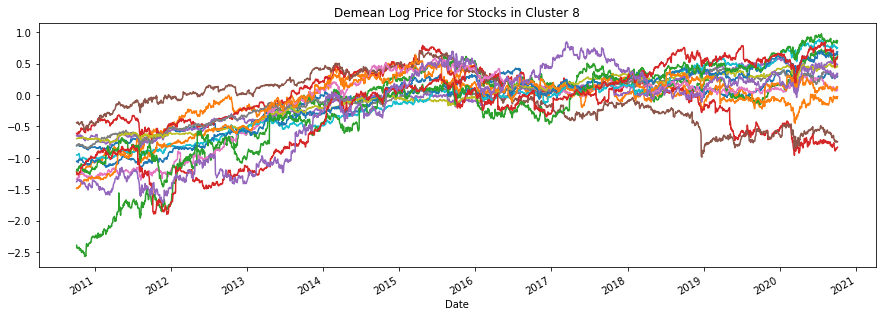

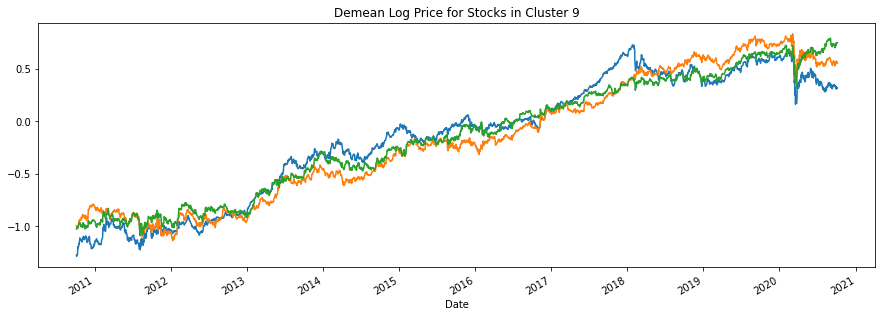

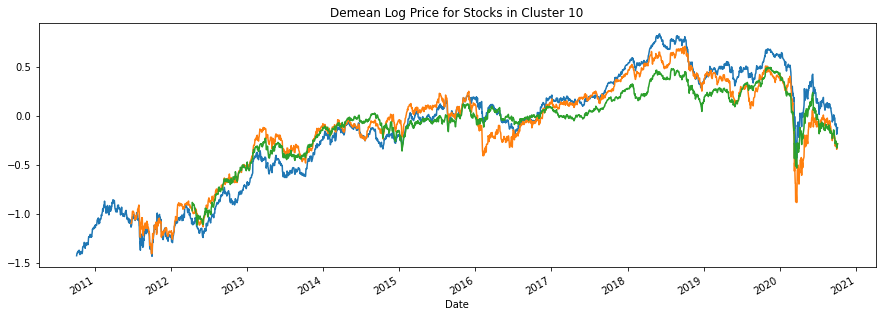

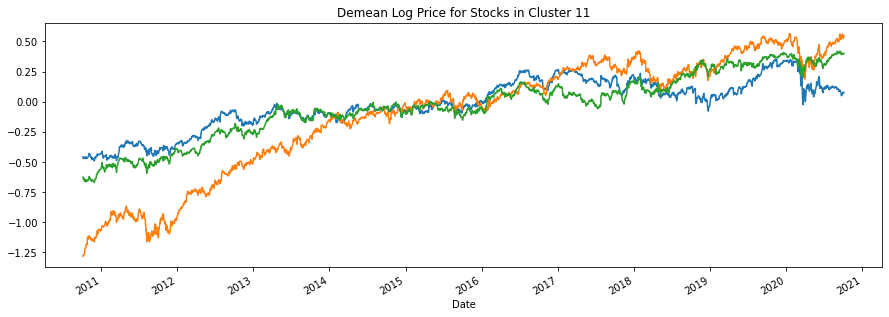

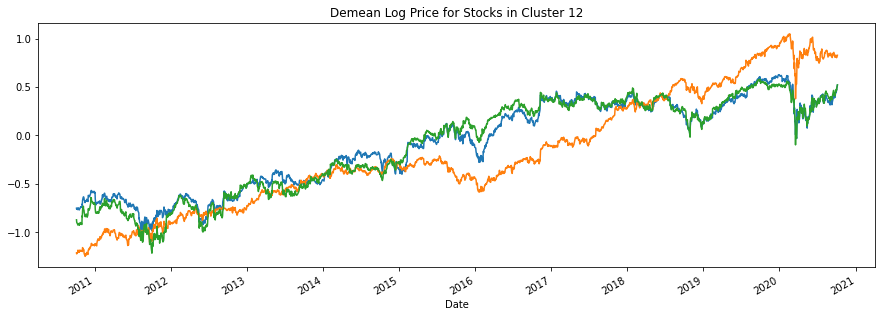

In [4]:
mlp.clustering(
    technique='dbscan', 
    params={
        'min_samples': 3,
        'eps': .1
    }
)
mlp.plot_cluster_members(figsize=(15, 5))
for cluster_id in sorted(mlp.cluster_ids['cluster_id'].unique().tolist()):
    mlp.plot_cluster_ts(cluster_id=cluster_id, figsize=(15, 5))

2020-10-09 17:21:59,437 - [ml_pairs:INFO] - Begining Part B. Unsupervised Learning Clustering using optics
2020-10-09 17:21:59,741 - [ml_pairs:INFO] - Total number of candidate pairs (before clustering): 121771.
2020-10-09 17:21:59,744 - [ml_pairs:INFO] - Total number of candidate pairs (after clustering): 3473.


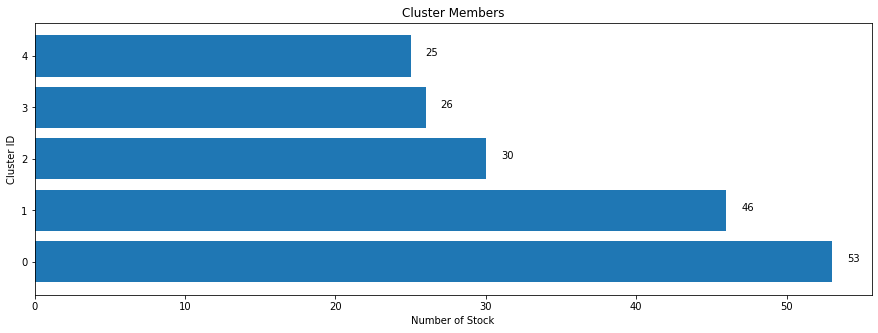

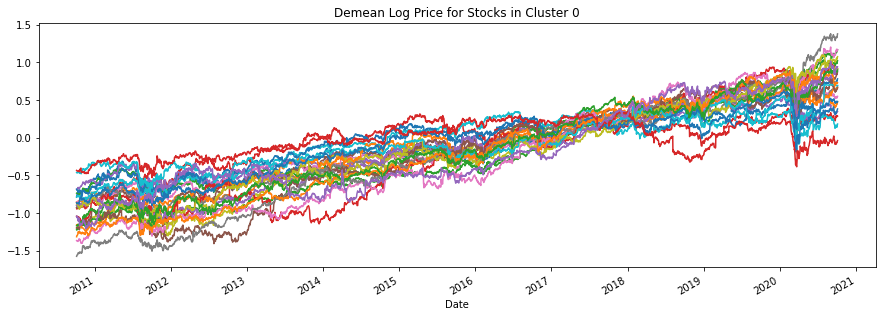

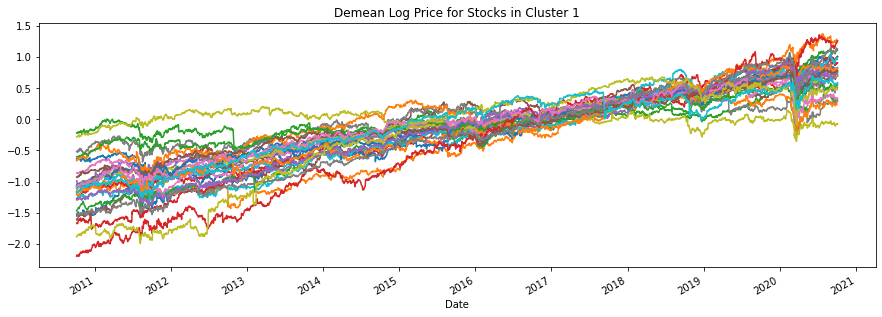

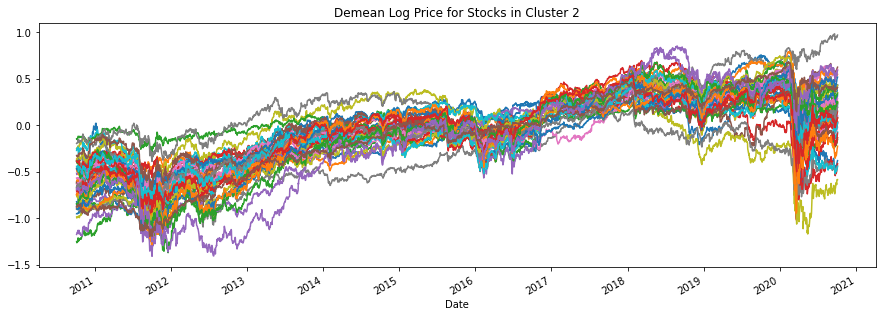

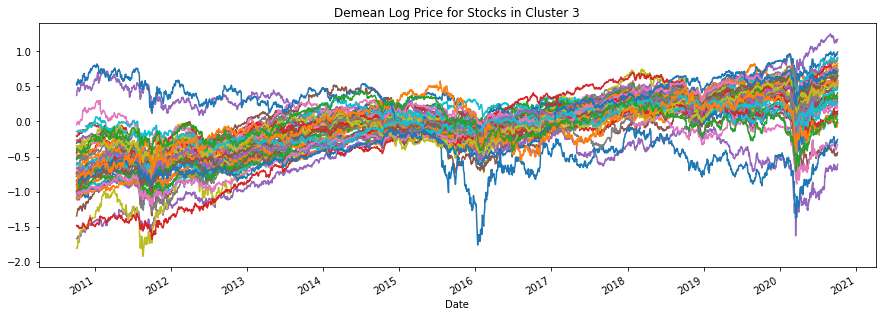

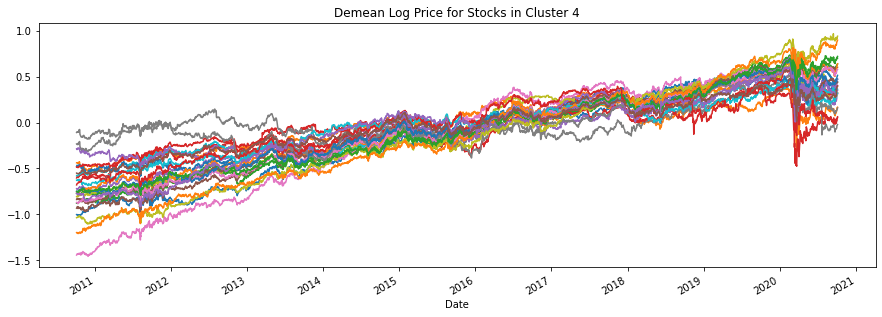

In [5]:
mlp.clustering(
    technique='optics',
    params={
        'min_samples': 10,
        'xi': .01, 
        'min_cluster_size': .05
    },
)
mlp.plot_cluster_members(figsize=(15, 5))
for cluster_id in sorted(mlp.cluster_ids['cluster_id'].unique().tolist()):
    mlp.plot_cluster_ts(cluster_id=cluster_id, figsize=(15, 5))

In [6]:
mlp.pairs_selection(max_lag=100, convenient_periods=126, mp=True)
mlp.selected_pairs

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3473/3473 [05:36<00:00, 10.33it/s]
2020-10-09 17:27:37,757 - [ml_pairs:INFO] - Total number of selected pairs: 50.


[['BLL', 'APD'],
 ['PWR', 'CMI'],
 ['ROK', 'PH'],
 ['MOS', 'SWK'],
 ['LIN', 'FAST'],
 ['PH', 'IEX'],
 ['DFS', 'RE'],
 ['NTRS', 'GL'],
 ['NTRS', 'SCHW'],
 ['NTRS', 'ALL'],
 ['RJF', 'BAC'],
 ['RJF', 'PNC'],
 ['RJF', 'ALL'],
 ['TFC', 'PNC'],
 ['RE', 'ALL'],
 ['COF', 'HBAN'],
 ['COF', 'BK'],
 ['COF', 'KEY'],
 ['COF', 'USB'],
 ['HBAN', 'SCHW'],
 ['PRU', 'PFG'],
 ['KEY', 'SCHW'],
 ['SIVB', 'ETFC'],
 ['WU', 'AON'],
 ['WU', 'FISV'],
 ['MSI', 'VRSN'],
 ['PAYX', 'FISV'],
 ['CTSH', 'STZ'],
 ['NDAQ', 'ACN'],
 ['AON', 'WLTW'],
 ['FIS', 'MMC'],
 ['FIS', 'WLTW'],
 ['ACN', 'CTAS'],
 ['VRSN', 'CTAS'],
 ['WLTW', 'CTAS'],
 ['PNW', 'DTE'],
 ['ES', 'WEC'],
 ['WEC', 'SO'],
 ['LNT', 'DUK'],
 ['AWK', 'XEL'],
 ['A', 'VAR'],
 ['BDX', 'WAT'],
 ['BIO', 'RMD'],
 ['WAT', 'BSX'],
 ['PKI', 'VAR'],
 ['SYK', 'BSX'],
 ['SYK', 'TFX'],
 ['SYK', 'MTD'],
 ['ZBH', 'MDT'],
 ['STE', 'VAR']]